In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# First we start with cases
# we have 2 files 'casos' and 'casos_long'
# let's explore both

#file_cases = "data/ccaa_covid19_casos.csv"

#df = pd.read_csv(file_cases)
#df.head()

In the first one we have one row per community and one column per day starting on the 27th of February, let's give a look at the 'long' one:

In [3]:
file_cases_long = "https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos_long.csv"

df_long = pd.read_csv(file_cases_long)
df_long.head()

fecha  cod_ine       CCAA  total
0  2020-02-27        1  Andalucía      1
1  2020-02-28        1  Andalucía      6
2  2020-02-29        1  Andalucía      8
3  2020-03-01        1  Andalucía     12
4  2020-03-02        1  Andalucía     12

This one is better, but let's continue exploring the different files we have in the repository, we are going to open 'ccaa_covid19_datos_isciii.csv'

In [4]:
file_data = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_datos_isciii.csv'

df = pd.read_csv(file_data)
df.head()

Fecha  cod_ine       CCAA  Casos  Hospitalizados  UCI  Fallecidos  \
0  2020-02-20        1  Andalucía    NaN             NaN  NaN         NaN   
1  2020-02-20        2     Aragón    NaN             NaN  NaN         NaN   
2  2020-02-20        3   Asturias    NaN             NaN  NaN         NaN   
3  2020-02-20        4   Baleares    1.0             NaN  NaN         NaN   
4  2020-02-20        5   Canarias    1.0             NaN  NaN         NaN   

   Recuperados  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
## THIS CELL IS FOR MADE DASH FIRST DATA

from datetime import datetime
import locale
locale.setlocale(locale.LC_ALL, 'es_ES') 

df['Fecha'] = pd.to_datetime(df['Fecha'])
last_update = df['Fecha'].max()
#print('{}'.format(last_update.strftime('%d de %B de %Y')))

df_grouped = df.groupby('Fecha').sum()
infected = df_grouped['Casos'][-1:]
deseased = df_grouped['Fallecidos'][-1:]
recovered = df_grouped['Recuperados'][-1:]
active_cases = infected - deseased - recovered

print(df_grouped['Casos'].iloc[-1])

166019.0


In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
hoy = df[df['Fecha'] == last_update]
hoy['Casos Activos'] = hoy['Casos'] - hoy['Fallecidos'] - hoy['Recuperados']
hoy = hoy.drop(columns=['Hospitalizados', 'UCI'])
hoy.head()



c:\users\juanlu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Fecha  cod_ine       CCAA    Casos  Fallecidos  Recuperados  \
969 2020-04-11        1  Andalucía  10006.0       799.0       1838.0   
970 2020-04-11        2     Aragón   4070.0       450.0        934.0   
971 2020-04-11        3   Asturias   1892.0       140.0        430.0   
972 2020-04-11        4   Baleares   1534.0       112.0        848.0   
973 2020-04-11        5   Canarias   1918.0        95.0        447.0   

     Casos Activos  
969         7369.0  
970         2686.0  
971         1322.0  
972          574.0  
973         1376.0

In [7]:
topo_json = 'https://raw.githubusercontent.com/deldersveld/topojson/master/countries/spain/spain-comunidad-with-canary-islands.json'


from urllib.request import urlopen
import json

with open('../data/geo.json') as response:
    communities = json.load(response)
    
communities["features"][0]



{'type': 'Feature',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-5.839882, 43.661228],
     [-5.842259, 43.657189],
     [-5.839757, 43.655414],
     [-5.840136, 43.653982],
     [-5.838444, 43.654141],
     [-5.837234, 43.652398],
     [-5.834158, 43.6545],
     [-5.835529, 43.651999],
     [-5.835804, 43.645473],
     [-5.834171, 43.64582],
     [-5.834546, 43.644028],
     [-5.829951, 43.642296],
     [-5.830102, 43.640231],
     [-5.826336, 43.639496],
     [-5.823781, 43.643448],
     [-5.820824, 43.644638],
     [-5.820927, 43.642853],
     [-5.819086, 43.643258],
     [-5.818058, 43.64223],
     [-5.817683, 43.642942],
     [-5.816216, 43.640475],
     [-5.815385, 43.641531],
     [-5.813574, 43.639928],
     [-5.812643, 43.642291],
     [-5.810545, 43.642226],
     [-5.809825, 43.632628],
     [-5.806614, 43.632887],
     [-5.805099, 43.635499],
     [-5.798889, 43.635246],
     [-5.797728, 43.636409],
     [-5.795675, 43.634389],
     [-5.794451, 43.636327],
   

In [8]:
hoy['Casos'].max()

46587.0

In [21]:
import plotly.express as px

fig = px.choropleth_mapbox(hoy, geojson=communities, locations='cod_ine', 
                    featureidkey='properties.codigo', 
                    hover_name='CCAA',
                    hover_data=['Casos Activos', 'Casos', 'Fallecidos', 'Recuperados'],
                    color='Casos Activos', 
                    color_continuous_scale="OrRd", 
                          mapbox_style='open-street-map',
                          zoom=5, center = {"lat": 40.416775, "lon": -3.703790})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [10]:
import plotly
print(plotly.__version__)

4.6.0


It seems that we found a file containing all the data we are looking for WONDERFUL! 

With this file we can start our exploratory data analysis, first of all, we have a lot of NaN in the file. I understand this NaN values as 0 people in these columns so let's fill it to avoid coming problems.

In [11]:
df = df.fillna(0)
df.describe()

cod_ine         Casos  Hospitalizados          UCI   Fallecidos  \
count   988.00    988.000000      988.000000   988.000000   988.000000   
mean     10.00   2397.335020     1181.581984   131.102227   214.538462   
std       5.48   5969.245561     3079.887694   346.734853   712.174834   
min       1.00      0.000000        0.000000     0.000000     0.000000   
25%       5.00      5.000000        0.000000     0.000000     0.000000   
50%      10.00    168.000000       41.500000     6.000000     2.000000   
75%      15.00   1738.750000      738.000000    91.250000    90.000000   
max      19.00  46587.000000    22369.000000  2658.000000  6278.000000   

        Recuperados  
count    988.000000  
mean     624.334008  
std     2458.771005  
min        0.000000  
25%        0.000000  
50%        2.000000  
75%      156.250000  
max    24683.000000

In [12]:
# Spain overall data
df_spain = df.groupby('Fecha').sum()
df_spain = df_spain.drop(columns=['cod_ine'])
df_spain.head()

Casos  Hospitalizados  UCI  Fallecidos  Recuperados
Fecha                                                          
2020-02-20    2.0            26.0  0.0         0.0          0.0
2020-02-21    2.0            30.0  1.0         0.0          0.0
2020-02-22    2.0            33.0  1.0         0.0          0.0
2020-02-23    2.0            38.0  2.0         0.0          0.0
2020-02-24    3.0            49.0  2.0         0.0          0.0

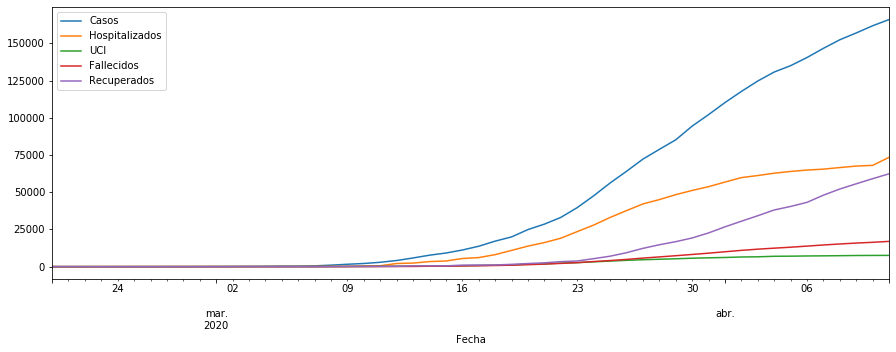

In [13]:
df_spain.plot(figsize=(15,5))

**TODO** Following the information we can see in the data repository README; for some communities for people in hospital (Hospitalizados) and people requiring ICU (UCI) date is acummulative

## DATA IS NOT TRUE BECAUSE SOME COMMUNITIES' DATA IS ONLY INPLACE NOT INCREMENT only concerning data about people in hospital and ICU

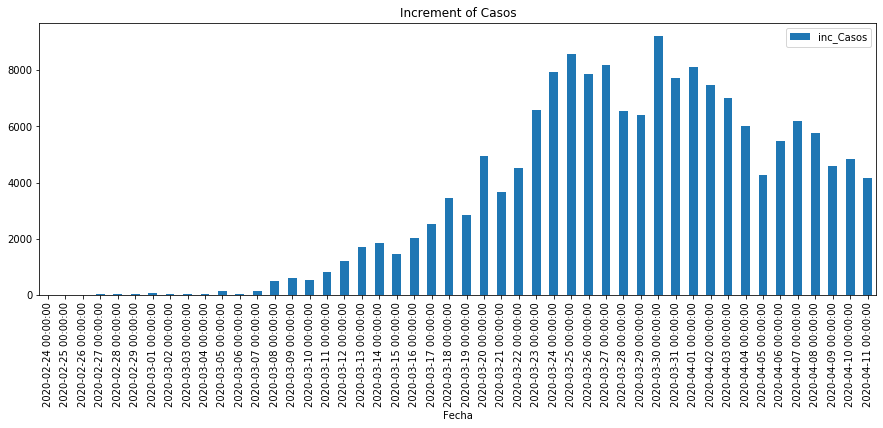

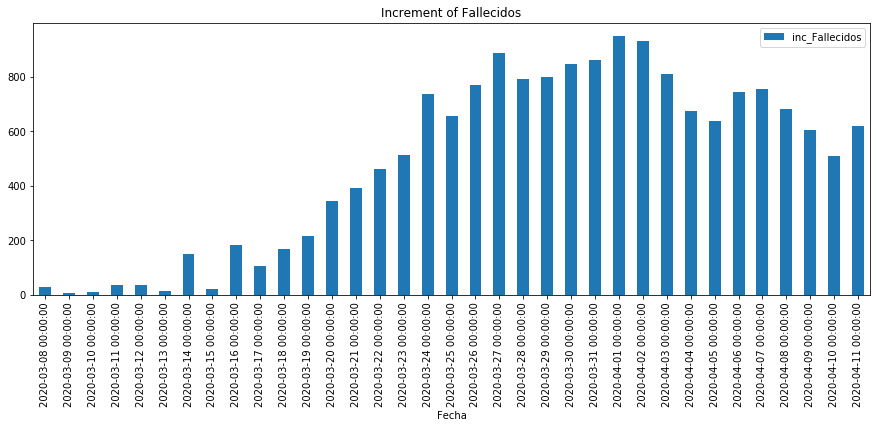

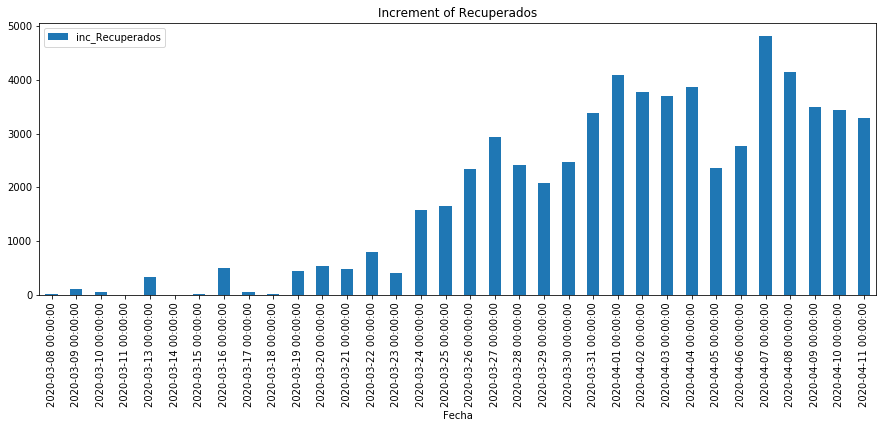

In [14]:
calculate_cols = ['Casos', 'Fallecidos', 'Recuperados']

for col in calculate_cols:
    df_spain['inc_{}'.format(col)] = df_spain['{}'.format(col)].diff()
    df_spain[df_spain['inc_{}'.format(col)] > 0].plot(figsize=(15,5), kind='bar', y='inc_{}'.format(col), title='Increment of {}'.format(col))


In [15]:
# Let see full dataframe plots
df = df.drop(columns='cod_ine')
df.head()

Fecha       CCAA  Casos  Hospitalizados  UCI  Fallecidos  Recuperados
0 2020-02-20  Andalucía    0.0             0.0  0.0         0.0          0.0
1 2020-02-20     Aragón    0.0             0.0  0.0         0.0          0.0
2 2020-02-20   Asturias    0.0             0.0  0.0         0.0          0.0
3 2020-02-20   Baleares    1.0             0.0  0.0         0.0          0.0
4 2020-02-20   Canarias    1.0             0.0  0.0         0.0          0.0

In [16]:
df_grouped = df
df_grouped['Fecha'] = pd.to_datetime(df_grouped.Fecha)
df_grouped = df_grouped.groupby(['Fecha', 'CCAA']).sum()
df_grouped = df_grouped.drop(columns=['Hospitalizados', 'UCI', 'Fallecidos', 'Recuperados'])
df_grouped.head()

Casos
Fecha      CCAA                
2020-02-20 Andalucía        0.0
           Aragón           0.0
           Asturias         0.0
           Baleares         1.0
           C. Valenciana    0.0

In [17]:
df_g = df.groupby(['Fecha', 'CCAA']).agg({'Casos': sum})
g = df_g['Casos'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))
res.unstack()

CCAA        Andalucía  Aragón  Asturias  Baleares  C. Valenciana  Canarias  \
Fecha                                                                        
2020-02-20        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-21        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-22        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-23        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-24        0.0     0.0       0.0       1.0            0.0       2.0   
2020-02-25        0.0     0.0       0.0       1.0            1.0       5.0   
2020-02-26        1.0     0.0       0.0       1.0            2.0       6.0   
2020-02-27        6.0     0.0       0.0       1.0            8.0       6.0   
2020-02-28        8.0     0.0       0.0       2.0           10.0       6.0   
2020-02-29       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-01       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-02       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-03       12.0     0.0       2.0       5.0           19.0       7.0   
2020-03-04       12.0     1.0       5.0       6.0           19.0       8.0   
2020-03-05       21.0     6.0       5.0       6.0           30.0      11.0   
2020-03-06       27.0    11.0       5.0       6.0           30.0      11.0   
2020-03-07       34.0    11.0       7.0       8.0           37.0      17.0   
2020-03-08       54.0    13.0       7.0      11.0           37.0      22.0   
2020-03-09       71.0    38.0      22.0      13.0           50.0      25.0   
2020-03-10       90.0    45.0      32.0      16.0           65.0      37.0   
2020-03-11      115.0    64.0      47.0      22.0           76.0      51.0   
2020-03-12      219.0    80.0      67.0      28.0           94.0      70.0   
2020-03-13      269.0   121.0      92.0      28.0          130.0      90.0   
2020-03-14      437.0   147.0     137.0      42.0          409.0     109.0   
2020-03-15      554.0   174.0     177.0      73.0          409.0     119.0   
2020-03-16      683.0   207.0     193.0      92.0          541.0     148.0   
2020-03-17      859.0   226.0     242.0     112.0          726.0     181.0   
2020-03-18     1008.0   281.0     292.0     169.0          921.0     220.0   
2020-03-19     1287.0   360.0     344.0     203.0         1105.0     287.0   
2020-03-20     1515.0   424.0     486.0     246.0         1363.0     348.0   
2020-03-21     1725.0   532.0     545.0     331.0         1604.0     414.0   
2020-03-22     1961.0   638.0     594.0     400.0         1901.0     481.0   
2020-03-23     2471.0   758.0     662.0     478.0         2167.0     557.0   
2020-03-24     3010.0   907.0     779.0     562.0         2616.0     657.0   
2020-03-25     3406.0  1116.0     841.0     660.0         3200.0     784.0   
2020-03-26     3793.0  1338.0     900.0     755.0         3532.0     878.0   
2020-03-27     4277.0  1592.0    1004.0     862.0         4034.0    1025.0   
2020-03-28     4682.0  1858.0    1088.0     958.0         4784.0    1125.0   
2020-03-29     5405.0  2078.0    1158.0    1000.0         5110.0    1204.0   
2020-03-30     5818.0  2272.0    1236.0    1069.0         5508.0    1262.0   
2020-03-31     6392.0  2491.0    1322.0    1131.0         5922.0    1380.0   
2020-04-01     6972.0  2700.0    1384.0    1204.0         6308.0    1444.0   
2020-04-02     7374.0  2889.0    1433.0    1257.0         6624.0    1490.0   
2020-04-03     7869.0  3078.0    1522.0    1271.0         6901.0    1564.0   
2020-04-04     8301.0  3232.0    1605.0    1293.0         7184.0    1622.0   
2020-04-05     8581.0  3347.0    1646.0    1320.0         7334.0    1649.0   
2020-04-06     8767.0  3449.0    1679.0    1369.0         7443.0    1725.0   
2020-04-07     8997.0  3549.0    1705.0    1412.0         7655.0    1762.0   
2020-04-08     9261.0  3685.0    1737.0    1448.0         7964.0    1834.0   
2020-04-09     9510.0 

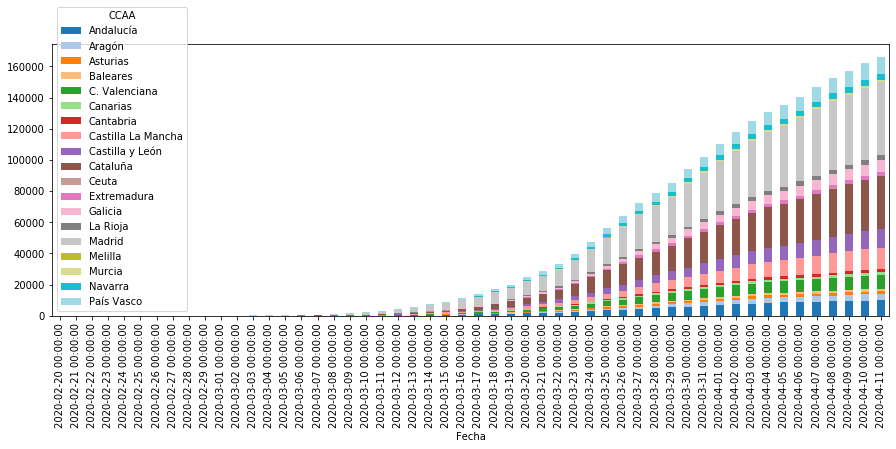

In [18]:
#res.unstack().plot(kind='bar', stacked=True, figsize=(15,5), cmap='tab20')
res.unstack().plot.bar(stacked=True, figsize=(15,5), cmap='tab20', sort_columns=True)

In [19]:
test = res.unstack()
test

CCAA        Andalucía  Aragón  Asturias  Baleares  C. Valenciana  Canarias  \
Fecha                                                                        
2020-02-20        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-21        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-22        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-23        0.0     0.0       0.0       1.0            0.0       1.0   
2020-02-24        0.0     0.0       0.0       1.0            0.0       2.0   
2020-02-25        0.0     0.0       0.0       1.0            1.0       5.0   
2020-02-26        1.0     0.0       0.0       1.0            2.0       6.0   
2020-02-27        6.0     0.0       0.0       1.0            8.0       6.0   
2020-02-28        8.0     0.0       0.0       2.0           10.0       6.0   
2020-02-29       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-01       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-02       12.0     0.0       1.0       2.0           15.0       7.0   
2020-03-03       12.0     0.0       2.0       5.0           19.0       7.0   
2020-03-04       12.0     1.0       5.0       6.0           19.0       8.0   
2020-03-05       21.0     6.0       5.0       6.0           30.0      11.0   
2020-03-06       27.0    11.0       5.0       6.0           30.0      11.0   
2020-03-07       34.0    11.0       7.0       8.0           37.0      17.0   
2020-03-08       54.0    13.0       7.0      11.0           37.0      22.0   
2020-03-09       71.0    38.0      22.0      13.0           50.0      25.0   
2020-03-10       90.0    45.0      32.0      16.0           65.0      37.0   
2020-03-11      115.0    64.0      47.0      22.0           76.0      51.0   
2020-03-12      219.0    80.0      67.0      28.0           94.0      70.0   
2020-03-13      269.0   121.0      92.0      28.0          130.0      90.0   
2020-03-14      437.0   147.0     137.0      42.0          409.0     109.0   
2020-03-15      554.0   174.0     177.0      73.0          409.0     119.0   
2020-03-16      683.0   207.0     193.0      92.0          541.0     148.0   
2020-03-17      859.0   226.0     242.0     112.0          726.0     181.0   
2020-03-18     1008.0   281.0     292.0     169.0          921.0     220.0   
2020-03-19     1287.0   360.0     344.0     203.0         1105.0     287.0   
2020-03-20     1515.0   424.0     486.0     246.0         1363.0     348.0   
2020-03-21     1725.0   532.0     545.0     331.0         1604.0     414.0   
2020-03-22     1961.0   638.0     594.0     400.0         1901.0     481.0   
2020-03-23     2471.0   758.0     662.0     478.0         2167.0     557.0   
2020-03-24     3010.0   907.0     779.0     562.0         2616.0     657.0   
2020-03-25     3406.0  1116.0     841.0     660.0         3200.0     784.0   
2020-03-26     3793.0  1338.0     900.0     755.0         3532.0     878.0   
2020-03-27     4277.0  1592.0    1004.0     862.0         4034.0    1025.0   
2020-03-28     4682.0  1858.0    1088.0     958.0         4784.0    1125.0   
2020-03-29     5405.0  2078.0    1158.0    1000.0         5110.0    1204.0   
2020-03-30     5818.0  2272.0    1236.0    1069.0         5508.0    1262.0   
2020-03-31     6392.0  2491.0    1322.0    1131.0         5922.0    1380.0   
2020-04-01     6972.0  2700.0    1384.0    1204.0         6308.0    1444.0   
2020-04-02     7374.0  2889.0    1433.0    1257.0         6624.0    1490.0   
2020-04-03     7869.0  3078.0    1522.0    1271.0         6901.0    1564.0   
2020-04-04     8301.0  3232.0    1605.0    1293.0         7184.0    1622.0   
2020-04-05     8581.0  3347.0    1646.0    1320.0         7334.0    1649.0   
2020-04-06     8767.0  3449.0    1679.0    1369.0         7443.0    1725.0   
2020-04-07     8997.0  3549.0    1705.0    1412.0         7655.0    1762.0   
2020-04-08     9261.0  3685.0    1737.0    1448.0         7964.0    1834.0   
2020-04-09     9510.0 

In [20]:
sns.set()
test = test.T
test.head()

Fecha          2020-02-20  2020-02-21  2020-02-22  2020-02-23  2020-02-24  \
CCAA                                                                        
Andalucía             0.0         0.0         0.0         0.0         0.0   
Aragón                0.0         0.0         0.0         0.0         0.0   
Asturias              0.0         0.0         0.0         0.0         0.0   
Baleares              1.0         1.0         1.0         1.0         1.0   
C. Valenciana         0.0         0.0         0.0         0.0         0.0   

Fecha          2020-02-25  2020-02-26  2020-02-27  2020-02-28  2020-02-29  \
CCAA                                                                        
Andalucía             0.0         1.0         6.0         8.0        12.0   
Aragón                0.0         0.0         0.0         0.0         0.0   
Asturias              0.0         0.0         0.0         0.0         1.0   
Baleares              1.0         1.0         1.0         2.0         2.0   
C. Valenciana         1.0         2.0         8.0        10.0        15.0   

Fecha          ...  2020-04-02  2020-04-03  2020-04-04  2020-04-05  \
CCAA           ...                                                   
Andalucía      ...      7374.0      7869.0      8301.0      8581.0   
Aragón         ...      2889.0      3078.0      3232.0      3347.0   
Asturias       ...      1433.0      1522.0      1605.0      1646.0   
Baleares       ...      1257.0      1271.0      1293.0      1320.0   
C. Valenciana  ...      6624.0      6901.0      7184.0      7334.0   

Fecha          2020-04-06  2020-04-07  2020-04-08  2020-04-09  2020-04-10  \
CCAA                                                                        
Andalucía          8767.0      8997.0      9261.0      9510.0      9712.0   
Aragón             3449.0      3549.0      3685.0      3831.0      3969.0   
Asturias           1679.0      1705.0      1737.0      1799.0      1827.0   
Baleares           1369.0      1412.0      1448.0      1488.0      1507.0   
C. Valenciana      7443.0      7655.0      7964.0      8331.0      8578.0   

Fecha          2020-04-11  
CCAA                       
Andalucía         10006.0  
Aragón             4070.0  
Asturias           1892.0  
Baleares           1534.0  
C. Valenciana      8841.0  

[5 rows x 52 columns]